In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
X = dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

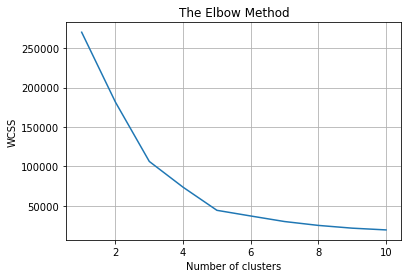

In [9]:
from sklearn.cluster import KMeans

wcss = []

for n_clstr in range(1,11):
    kmeans = KMeans(n_clusters =n_clstr, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# 5 - подхоящее количество кластеров

In [12]:
kmeans = KMeans(n_clusters =5, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

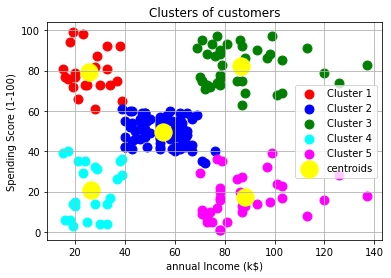

In [23]:
plt.scatter(
        X[y_kmeans == 0, 0],
        X[y_kmeans == 0, 1],
        s=80,
        c='red',
        label='Cluster 1'
        )
plt.scatter(
        X[y_kmeans == 1, 0],
        X[y_kmeans == 1, 1],
        s=80,
        c='blue',
        label='Cluster 2'
        )
plt.scatter(
        X[y_kmeans == 2, 0],
        X[y_kmeans == 2, 1],
        s=80,
        c='green',
        label='Cluster 3'
        )
plt.scatter(
        X[y_kmeans == 3, 0],
        X[y_kmeans == 3, 1],
        s=80,
        c='cyan',
        label='Cluster 4'
        )
plt.scatter(
        X[y_kmeans == 4, 0],
        X[y_kmeans == 4, 1],
        s=80,
        c='magenta',
        label='Cluster 5'
        )

plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s = 300,
    c = 'yellow',
    label = 'centroids'
        )

plt.title('Clusters of customers')
plt.xlabel('annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()